## Correlation between the Rank of Explanations ${\alpha}_i\phi(\mathbf{x}_i)^T\phi(\mathbf{x}_t)$ and term ${\alpha}_i\phi(\mathbf{x}_i)$ for RPS-$l_2$ and RPS-LJE
Figure 2

In [ ]:
import torch
import numpy as np
from matplotlib import pyplot as plt

path = '../saved_models/base'
file = np.load('{}/model/saved_outputs.npz'.format(path))
intermediate_train = file['intermediate_train']
intermediate_test = file['intermediate_test']
labels_train = file['labels_train']
labels_test = file['labels_test']

pred_train = file['pred_train'].squeeze()
pred_test = file['pred_test'].squeeze()



In [16]:
weight_matrix_rep = np.load('{}/calculated_weights/representer_weight_matrix.npz'.format(path), allow_pickle=True)['weight_matrix']
weight_matrix_influence = np.load('{}/calculated_weights/influence_weight_matrix.npz'.format(path), allow_pickle=True)['weight_matrix'].squeeze()
jaccobian_test = np.load('{}/calculated_weights/influence_weight_matrix.npz'.format(path), allow_pickle=True)['jaccobian_test']
weight_matrix_ours = np.load('{}/calculated_weights/ours_weight_matrix_with_lr_0.01.npz'.format(path), allow_pickle=True)['weight_matrix'].squeeze()

In [17]:
alpha_fi_rep = weight_matrix_rep*intermediate_train

In [18]:
def get_all_influence(test_point):
    representer_weight = weight_matrix_rep[:,0] * np.dot(intermediate_train,
                                           intermediate_test[test_point,:])
    ours_weight = np.dot(weight_matrix_ours,
                 intermediate_test[test_point,:])
    return representer_weight, ours_weight

In [19]:
test_points = np.random.randint(0,2000, size=(500))
x_rep = []
x_ours = []
y = []
for test_point in test_points:
    representer_weight, ours_weight = get_all_influence(test_point)
    order_rep = np.abs(representer_weight).argsort()
    order_ours = np.abs(ours_weight).argsort()
    for i in range(10000):
        y.append(i)
        x_rep.append(np.linalg.norm(alpha_fi_rep[order_rep[i]]))
        x_ours.append(np.linalg.norm(weight_matrix_ours[order_ours[i]]))
y = np.stack(y)
x_rep = np.stack(x_rep)
x_ours = np.stack(x_ours)

In [20]:
y_name = 'rank of $|\\alpha_ik(\mathbf{x}_i,\mathbf{x}_j)|$'
x_name = 'vector length of $\\alpha_i \phi(\mathbf{x}_i)$'
print(y_name)

rank of $|\alpha_ik(\mathbf{x}_i,\mathbf{x}_j)|$


In [21]:
import pandas as pd

df_rep = pd.DataFrame({y_name:y, x_name:x_rep})
df_ours = pd.DataFrame({y_name:y, x_name:x_ours})
# df_rep.to_csv('Importance_vs_weight_rep.csv')
# df_ours.to_csv('Importance_vs_weight_ours.csv')

In [ ]:
# df_rep = pd.read_csv('Importance_vs_weight_rep.csv', index_col=0)
# df_ours = pd.read_csv('Importance_vs_weight_ours.csv', index_col=0)


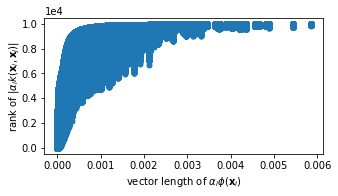

In [24]:
plt.figure(figsize=(5,2.5))
plt.plot(x_name, y_name, data=df_rep,
             marker='o',markersize=5, linestyle='none')
plt.xlabel(x_name)
plt.ylabel(y_name, labelpad=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,4))
plt.savefig('figs/order_vs_weight_rep.png',  dpi=300, bbox_inches='tight')

plt.show()

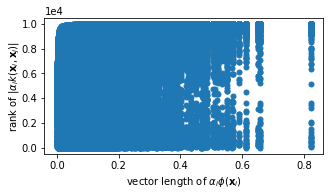

In [25]:
plt.figure(figsize=(5,2.5))
plt.plot(x_name, y_name, data=df_ours,
             marker='o',markersize=5, linestyle='none')
plt.xlabel(x_name)
plt.ylabel(y_name, labelpad=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,4))
plt.savefig('figs/order_vs_weight_ours.png', dpi=300, bbox_inches='tight')

plt.show()